## First we will visualize the train data

In [1]:
import numpy as np
import pandas as pd
import sklearn
from matplotlib import pyplot as plt

In [2]:
!ls -l china-real-estate-demand-prediction/train

total 4088
-rw-r--r--@ 1 abhisekmaiti  staff    6127 19 Sep 09:47 city_indexes.csv
-rw-r--r--@ 1 abhisekmaiti  staff  130589 19 Sep 09:47 city_search_index.csv
-rw-r--r--@ 1 abhisekmaiti  staff  174046 19 Sep 09:47 land_transactions_nearby_sectors.csv
-rw-r--r--@ 1 abhisekmaiti  staff  168460 19 Sep 09:47 land_transactions.csv
-rw-r--r--@ 1 abhisekmaiti  staff  590991 19 Sep 09:47 new_house_transactions_nearby_sectors.csv
-rw-r--r--@ 1 abhisekmaiti  staff  376737 19 Sep 09:47 new_house_transactions.csv
-rw-r--r--@ 1 abhisekmaiti  staff  322116 19 Sep 09:47 pre_owned_house_transactions_nearby_sectors.csv
-rw-r--r--@ 1 abhisekmaiti  staff  241849 19 Sep 09:47 pre_owned_house_transactions.csv
-rw-r--r--@ 1 abhisekmaiti  staff   63502 19 Sep 09:47 sector_POI.csv


In [3]:
land_transactions = pd.read_csv('china-real-estate-demand-prediction/train/land_transactions.csv')
city_search_index = pd.read_csv('china-real-estate-demand-prediction/train/city_search_index.csv')

land_transactions = pd.read_csv('china-real-estate-demand-prediction/train/land_transactions.csv')
land_transactions_nearby_sectors = pd.read_csv('china-real-estate-demand-prediction/train/land_transactions_nearby_sectors.csv')

new_house_transactions = pd.read_csv('china-real-estate-demand-prediction/train/new_house_transactions.csv')
new_house_transactions_nearby_sectors = pd.read_csv('china-real-estate-demand-prediction/train/new_house_transactions_nearby_sectors.csv')

pre_owned_house_transactions = pd.read_csv('china-real-estate-demand-prediction/train/pre_owned_house_transactions.csv')
pre_owned_house_transactions_nearby_sectors = pd.read_csv('china-real-estate-demand-prediction/train/pre_owned_house_transactions_nearby_sectors.csv')

sector_POI = pd.read_csv('china-real-estate-demand-prediction/train/sector_POI.csv')

#land_transactions.head(5)
#land_transactions.head()
#land_transactions_nearby_sectors.head()
#new_house_transactions.head()
#new_house_transactions_nearby_sectors.shape #head()
#pre_owned_house_transactions.head()
#pre_owned_house_transactions_nearby_sectors.head()
#sector_POI.tail()

In [4]:

print(pre_owned_house_transactions_nearby_sectors.shape, " rows and columns.")
for cols in pre_owned_house_transactions_nearby_sectors:
    print(f"{cols} has {pre_owned_house_transactions_nearby_sectors[cols].isna().sum()} NaN values i.e. {100*pre_owned_house_transactions_nearby_sectors[cols].isna().sum()/pre_owned_house_transactions_nearby_sectors.shape[0]} % \n")

(5427, 6)  rows and columns.
month has 0 NaN values i.e. 0.0 % 

sector has 0 NaN values i.e. 0.0 % 

num_pre_owned_house_transactions_nearby_sectors has 0 NaN values i.e. 0.0 % 

area_pre_owned_house_transactions_nearby_sectors has 0 NaN values i.e. 0.0 % 

amount_pre_owned_house_transactions_nearby_sectors has 0 NaN values i.e. 0.0 % 

price_pre_owned_house_transactions_nearby_sectors has 0 NaN values i.e. 0.0 % 



## Input files analysis:
  <u> sector_POI </u> : 
  - It has 86 rows and 142 columns
  - 'surrounding_housing_average_price' has 4 NaN values (4.7%)
  - 'surrounding_shop_average_rent' has 3 NaN values (3.5%)

  <u> city_indexes </u> :
  - It had 7 rows and 74 columns.
  - total_fixed_assets_10k has 5 NaN values i.e. 71.4 %
  - main_business_taxes_and_surcharges_10k has 4 NaN values i.e. 57.1 %
  - total_fixed_asset_investment_10k has 7 NaN values i.e. 100.0 %
  - real_estate_development_investment_completed_10k has 4 NaN values i.e. 57.1 %
  - residential_development_investment_completed_10k has 4 NaN values i.e. 57.1 %
  - science_expenditure_10k has 1 NaN values i.e. 14.3 %
  - education_expenditure_10k has 1 NaN values i.e. 14.3 %

  <u> land_transactions </u> :
  - It has 5896 rows and 6 columns
  - A lot of 0.0 but no NaN

  <u> land_transactions_nearby_sectors </u> :
  - It has 5025 rows and 6 columns
  - A lot of 0.0 but no NaN

  <u> new_house_transactions </u> :
  - It has 5433 rows and 11 columns
  - num_new_house_available_for_sale has 14 NaN values i.e. 0.26 %
  - area_new_house_available_for_sale has 14 NaN values i.e. 0.26 %
  - period_new_house_sell_through has 14 NaN values i.e. 0.26 %

  <u> new_house_transactions_nearby_sectors </u> :
  - It has 5360 rows and 11 columns
  - No NaN values

  <u> pre_owned_house_transactions </u>
  - It has 5360 rows and 6 columns
  - price_pre_owned_house_transactions has 14 NaN values i.e. 0.3 %

  <u> pre_owned_house_transactions_nearby_sectors </u>
  - It has 5427 rows and 6 columns
  - No NaN values

In [5]:
pre_owned_house_transactions["ts"] = pd.to_datetime(pre_owned_house_transactions['month'], format='%Y-%b')
pre_owned_house_transactions["month"] = pre_owned_house_transactions["ts"].dt.month
pre_owned_house_transactions["year"] = pre_owned_house_transactions["ts"].dt.year

In [6]:
monthly_counts = pre_owned_house_transactions.groupby(['year', 'month']).size().unstack(fill_value=0)

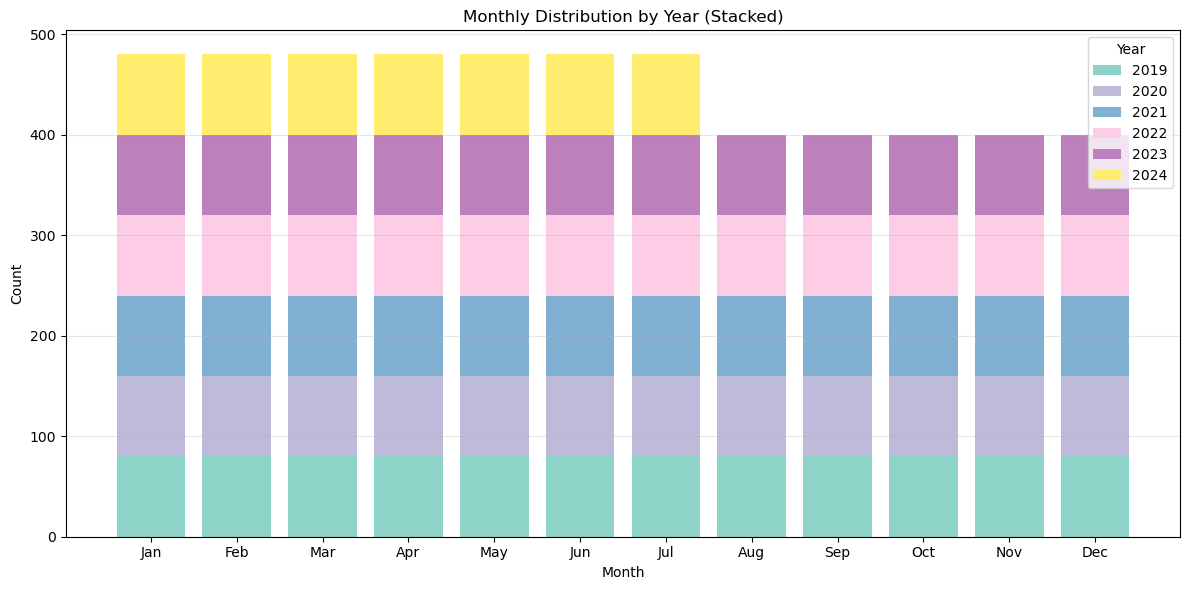

In [7]:
plt.ion()

plt.figure(figsize=(12, 6))

# Get unique years for colors
years = monthly_counts.index
colors = plt.cm.Set3(np.linspace(0, 1, len(years)))  # Use Set3 colormap

# Create stacked bars
bottom = np.zeros(12)  # 12 months
width = 0.8

for i, year in enumerate(years):
    # Get data for this year (fill missing months with 0)
    year_data = []
    for month in range(1, 13):
        if month in monthly_counts.columns:
            year_data.append(monthly_counts.loc[year, month])
        else:
            year_data.append(0)
    
    plt.bar(range(1, 13), year_data, bottom=bottom, 
            label=str(year), color=colors[i], width=width)
    
    # Update bottom for next stack
    bottom += year_data

# Customize the plot
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Distribution by Year (Stacked)')
plt.xticks(range(1, 13), month_names)
plt.legend(title='Year')
plt.grid(axis='y', alpha=0.3)

# Adjust layout and show
plt.tight_layout()
plt.show()


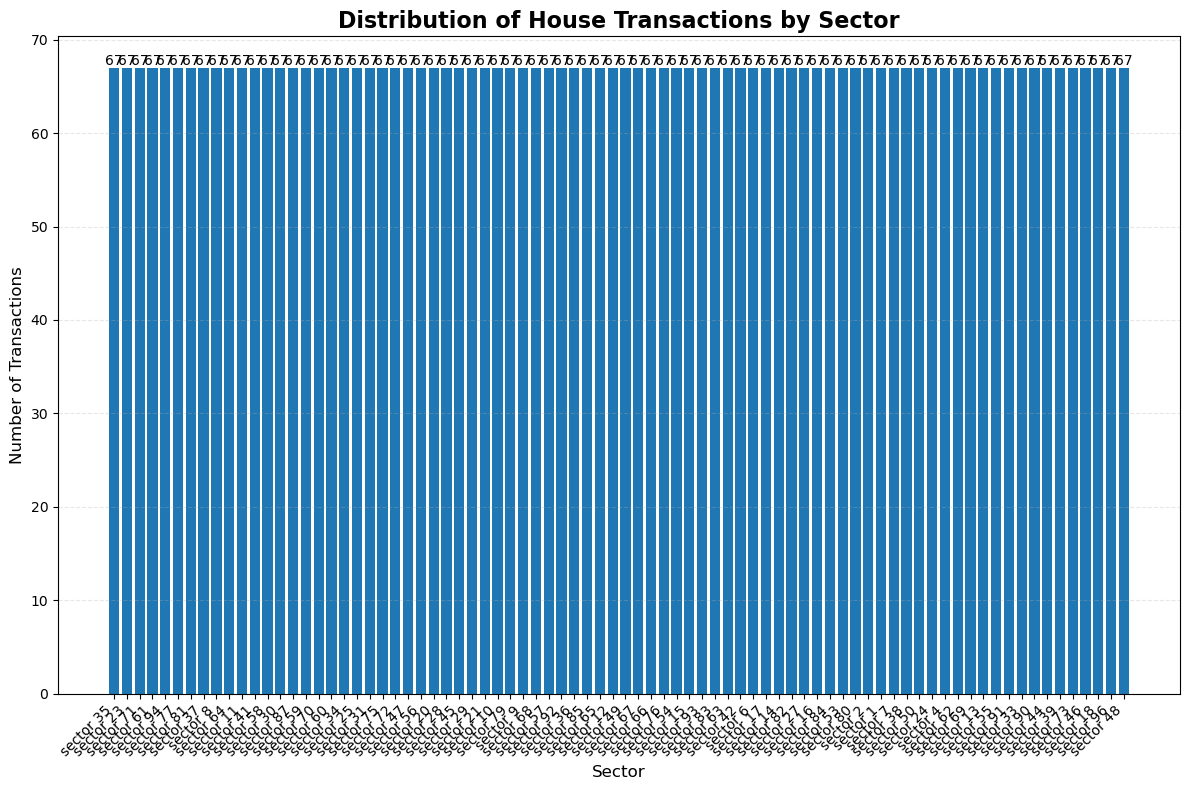

In [8]:
sector_counts = pre_owned_house_transactions['sector'].value_counts()

# Create the histogram (bar chart for categorical data)
plt.figure(figsize=(12, 8))
bars = plt.bar(sector_counts.index, sector_counts.values)

# Customize the plot
plt.title('Distribution of House Transactions by Sector', fontsize=16, fontweight='bold')
plt.xlabel('Sector', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.grid(axis='y', alpha=0.3, linestyle='--')